In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
import os

In [5]:
path = '/home/investigator/mariandbt/python/data/'
filename = os.path.join(path, 'Acq_dig2-192.168.0.254_CH2-19.txt')

with open(filename) as f:
    data = np.loadtxt(f)

In [6]:
data

array([[ -83.9246 , -139.956  , -197.055  , ...,  -33.1731 ,  -42.0233 ,
         -63.2944 ],
       [ -99.2142 , -143.771  , -195.407  , ...,   -5.70687,   -6.74449,
         -13.9162 ],
       [ -41.3519 ,  -91.4321 , -158.297  , ...,  -33.8445 ,  -37.0794 ,
         -56.3363 ],
       ...,
       [-145.052  , -250.462  , -354.04   , ...,  -30.7012 ,  -49.897  ,
         -81.2085 ],
       [ -91.1269 , -151.583  , -214.328  , ...,  -32.7764 ,  -41.6876 ,
         -62.3178 ],
       [ -89.7841 , -134.127  , -195.895  , ...,  -21.3931 ,  -23.9567 ,
         -43.122  ]])

### Data mean

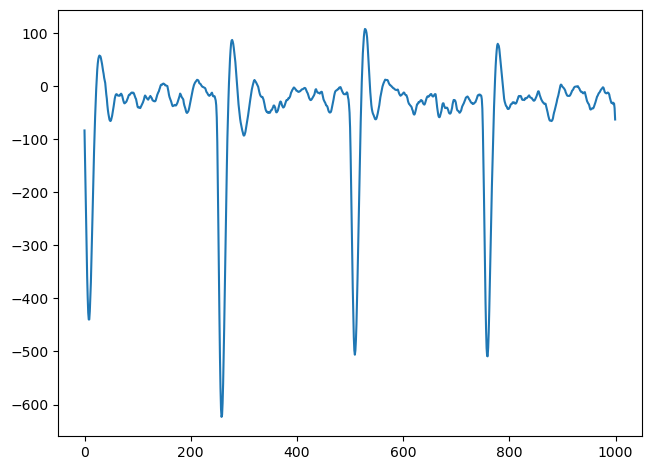

In [6]:
fig, ax = plt.subplots(1,1, constrained_layout=True)
    
# ax.plot(np.mean(data, axis=0))
ax.plot(data[0])
ax.set_aspect('equal')

In [7]:
len(data[0])

1000

#### Peak between 200 and 400 of the mean

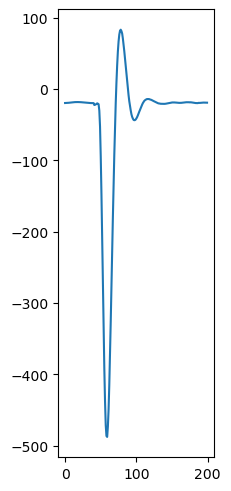

In [4]:
fig, ax = plt.subplots(1,1, constrained_layout=True)
    
# ax.plot(np.mean(data, axis=0))
ax.plot(np.mean(data, axis=0)[200:400])
# ax.plot(data[120])
# ax.plot(data[0][600:800])
ax.set_aspect('equal')

In [5]:
! pwd

/home/investigator/mariandbt/python/notebooks


### Negative Gaussian fit for ONE peak (region) of ONE frame (data slice)

In [6]:
# data[:][200:400]

In [9]:
# Fitting distributions to define

# note: pdf are normilized to 1 so we have yo add an amplitude param

def gauss_neg(x, a,  mu, sigma):
    return -a*stats.norm.pdf(x, mu, sigma) 

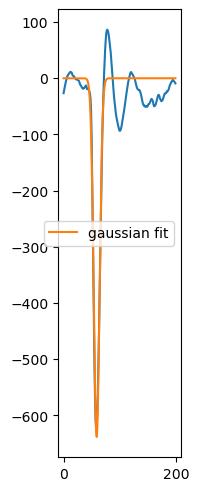

In [8]:
fig, ax = plt.subplots(1,1, constrained_layout=True)

data_slice = data[0]
data_region = data_slice[200*1:200*(1+1)]
x_ax = range(len(data_region))

ax.plot(data_region)
# ax.plot(data[0])
ax.set_aspect('equal')

# negative gaussian fit
popt, pcov = scipy.optimize.curve_fit(gauss_neg, x_ax, data_region) 
# popt, pcov = scipy.optimize.curve_fit(gauss_neg, range(len(data_region)), data_slice, p0=[3e6, 1e4, 5e2]) 
a, mu, sigma = popt
best_fit_line = gauss_neg(x_ax, a, mu, sigma)


plt.plot(x_ax, best_fit_line, label='gaussian fit')
plt.legend(fontsize=10, loc='best')

In [9]:
mu, sigma, best_fit_line.min()

(58.84789797990774, 5.122595203065702, -638.1870726023687)

### Negative Gaussian fit for the THREE peaks (regions) of ONE frame (data slice)

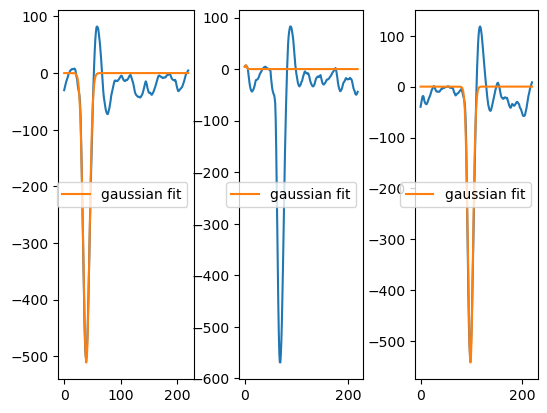

In [10]:
# fig = plt.figure(figsize=(13,10))
fig = plt.figure()
data_slice = data[980]
offset = 220

for i in range(1, 4):
    ax = plt.subplot(1, 3, i)

    data_region = data_slice[offset*i:offset*(i+1)]
    x_ax = range(len(data_region))

    ax.plot(data_region)
    # ax.plot(data[0])
    ax.set_aspect('equal')

    # negative gaussian fit
    popt, pcov = scipy.optimize.curve_fit(gauss_neg, x_ax, data_region) 
    # popt, pcov = scipy.optimize.curve_fit(gauss_neg, range(len(data_region)), data_slice, p0=[3e6, 1e4, 5e2]) 
    a, mu, sigma = popt
    best_fit_line = gauss_neg(x_ax, a, mu, sigma)


    ax.plot(x_ax, best_fit_line, label='gaussian fit')
    ax.legend(fontsize=10, loc='best')

In [11]:
a, mu, sigma

(6785.735428342527, 98.03296002759788, 4.99433942296199)

### Negative Gaussian fit for the THREE peaks (regions) of ONE frame (data slice): test for different slices

#### To obtain the correct fit, the regions where we do it have to be adjusted in some cases, that's why we manually introduce 'offset'

In [44]:
data_slice[np.where(data_slice == data_slice[200:400].min())]

array([-575.723])

In [80]:
np.where(data_slice == data_slice[200:400].min())[0][0]

259

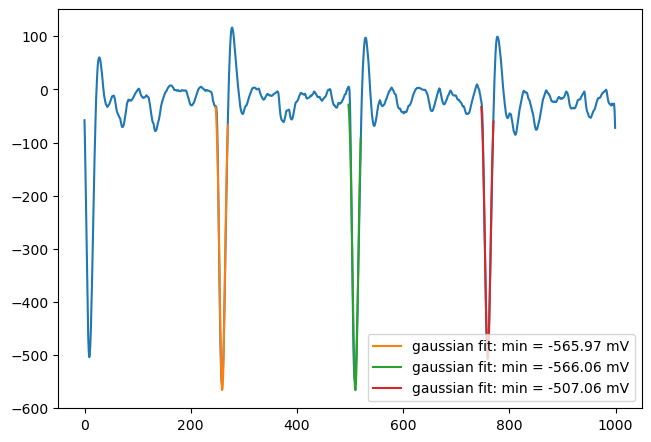

In [76]:
fig, ax = plt.subplots(1,2, constrained_layout=True)

data_slice = data[1354]
data_slice = data[1215]
data_slice = data[536]
data_slice = data[280]
data_slice = data[380]
ax.plot(data_slice)
ax.set_aspect('equal')

# offset = 215
# offset = 213
# offset = 210

for i in range(1, 4):

#     data_region = data_slice[220*i:200*(i+1)]
#     data_region = data_slice[220*i:220*(i+1)]
    offset = int(np.where(data_slice == data_slice[200*i:200*(i+1)].min())[0])
    data_region = data_slice[offset - 12:offset + 12]
    x_ax = range(len(data_region))

    # negative gaussian fit
    popt, pcov = scipy.optimize.curve_fit(gauss_neg, x_ax, data_region) 
#     popt, pcov = scipy.optimize.curve_fit(gauss_neg, range(len(data_region)), data_region, p0=[3e6, 1e4, 5e2]) 
    a, mu, sigma = popt
    best_fit_line = gauss_neg(x_ax, a, mu, sigma)

#     x_ax = range(220*i, len(data_region) + 220*i)
#     x_ax = range(offset*i, len(data_region) + offset*i)
    x_ax = range(offset - 12, len(data_region) + offset - 12)

    ax.plot(x_ax, best_fit_line, label='gaussian fit: min = %.2f mV' %(best_fit_line.min()))
    ax.legend(fontsize=10, loc='best')


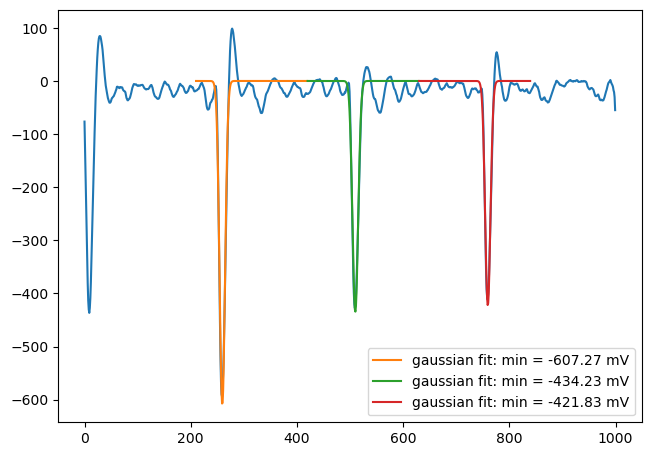

In [11]:
fig, ax = plt.subplots(1,1, constrained_layout=True)

# data_slice = data[1354]
# data_slice = data[1215]
# data_slice = data[536]
data_slice = data[280]
# data_slice = data[380]
ax.plot(data_slice)
ax.set_aspect('equal')

# offset = 215
# offset = 213
offset = 210

for i in range(1, 4):

#     data_region = data_slice[220*i:200*(i+1)]
#     data_region = data_slice[220*i:220*(i+1)]
    data_region = data_slice[offset*i:offset*(i+1)]
    x_ax = range(len(data_region))

    # negative gaussian fit
    popt, pcov = scipy.optimize.curve_fit(gauss_neg, x_ax, data_region) 
#     popt, pcov = scipy.optimize.curve_fit(gauss_neg, range(len(data_region)), data_region, p0=[3e6, 1e4, 5e2]) 
    a, mu, sigma = popt
    best_fit_line = gauss_neg(x_ax, a, mu, sigma)

#     x_ax = range(220*i, len(data_region) + 220*i)
    x_ax = range(offset*i, len(data_region) + offset*i)

    ax.plot(x_ax, best_fit_line, label='gaussian fit: min = %.2f mV' %(best_fit_line.min()))
    ax.legend(fontsize=10, loc='best')


#### We now introduce a dinamyc offset that changes when the fit is not correct (min > -100mV) to find a better fit

1 205
2 205
3 205
3 215
3 225
3 235


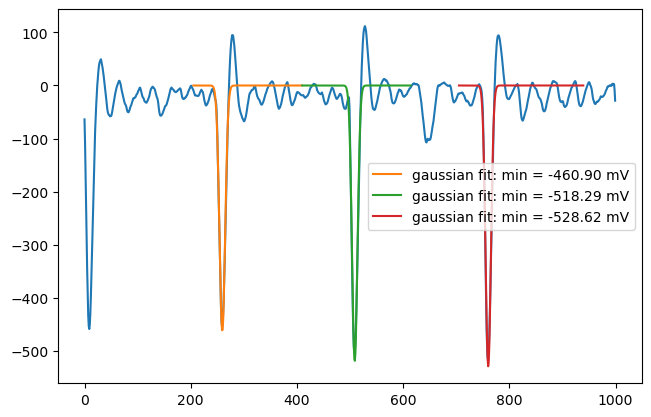

In [40]:
fig, ax = plt.subplots(1,1, constrained_layout=True)

data_slice = data[1751]
ax.plot(data_slice)
ax.set_aspect('equal')

gauss_min = []

for i in range(1, 4):
    
    offset = 205
#     offset = 250
    best_min = 0.

#     while best_min > -100.:
    while best_min > -200.:
        
        print(i, offset)
        
        data_region = data_slice[offset*i:offset*(i+1)]
        x_ax = range(len(data_region))

        # negative gaussian fit
        popt, pcov = scipy.optimize.curve_fit(gauss_neg, x_ax, data_region) 
#         popt, pcov = scipy.optimize.curve_fit(gauss_neg, range(len(data_region)), data_region, p0=[3e6, 1e4, 5e2]) 
        a, mu, sigma = popt
        best_fit_line = gauss_neg(x_ax, a, mu, sigma)

        x_ax = range(offset*i, len(data_region) + offset*i)
    
        best_min = best_fit_line.min()
        offset = offset + 10

    gauss_min.append(best_min)
    
    ax.plot(x_ax, best_fit_line, label='gaussian fit: min = %.2f mV' %(best_min))
    ax.legend(fontsize=10, loc='best')
    
gauss_min = np.array(gauss_min)


In [14]:
np.shape(data), len(data)

((2909, 1000), 2909)

### Negative Gaussian fit for the THREE peaks (regions) of ALL frames (data)

In [21]:
gauss_min = []
gauss_peak_pos = []

for j in range(len(data)):
    

    data_slice = data[j]

    for i in range(1, 4):

        offset = 205
        best_min = 0.

        while best_min > -100.:

#             print(j, i, offset)

            data_region = data_slice[offset*i:offset*(i+1)]
            x_ax = range(len(data_region))

            # negative gaussian fit
            popt, pcov = scipy.optimize.curve_fit(gauss_neg, x_ax, data_region) 
#             popt, pcov = scipy.optimize.curve_fit(gauss_neg, range(len(data_region)), data_region, p0=[3e6, 1e4, 5e2]) 
            a, mu, sigma = popt
            best_fit_line = gauss_neg(x_ax, a, mu, sigma)

            x_ax = range(offset*i, len(data_region) + offset*i)

            best_min = best_fit_line.min()
            offset = offset + 10

        gauss_min.append(best_min)
        gauss_peak_pos.append(j)

    
gauss_min = np.array(gauss_min)
gauss_peak_pos = np.array(gauss_peak_pos)

# fig, ax = plt.subplots(1,1, constrained_layout=True)
# ax.plot(data_slice)
# ax.set_aspect('equal')

# ax.plot(x_ax, best_fit_line, label='gaussian fit: min = %.2f mV' %(best_min))
# ax.legend(fontsize=10, loc='best')



In [101]:
gauss_min = []
gauss_peak_pos = []

for j in range(len(data)):
    

    data_slice = data[j]

    for i in range(1, 4):

#         data_region = data_slice[220*i:200*(i+1)]
#         data_region = data_slice[220*i:220*(i+1)]
#         offset = int(np.where(data_slice == data_slice[200*i:200*(i+1)].min())[0])
        offset = np.where(data_slice == data_slice[200*i:200*(i+1)].min())[0]
        offset = offset[np.where((offset > 200*i) & (offset < 200*(i+1)))][0]    
        print(j, i, offset)
        
        data_region = data_slice[offset - 12:offset + 12]
        x_ax = range(len(data_region))

        # negative gaussian fit
        popt, pcov = scipy.optimize.curve_fit(gauss_neg, x_ax, data_region) 
#         popt, pcov = scipy.optimize.curve_fit(gauss_neg, range(len(data_region)), data_region, p0=[3e6, 1e4, 5e2]) 
        a, mu, sigma = popt
        best_fit_line = gauss_neg(x_ax, a, mu, sigma)

#         x_ax = range(220*i, len(data_region) + 220*i)
#         x_ax = range(offset*i, len(data_region) + offset*i)
        x_ax = range(offset - 12, len(data_region) + offset - 12)

        ax.plot(x_ax, best_fit_line, label='gaussian fit: min = %.2f mV' %(best_fit_line.min()))
        ax.legend(fontsize=10, loc='best')

        best_min = best_fit_line.min()

        gauss_min.append(best_min)
        gauss_peak_pos.append(j)

    
gauss_min = np.array(gauss_min)
gauss_peak_pos = np.array(gauss_peak_pos)

# fig, ax = plt.subplots(1,1, constrained_layout=True)
# ax.plot(data_slice)
# ax.set_aspect('equal')

# ax.plot(x_ax, best_fit_line, label='gaussian fit: min = %.2f mV' %(best_min))
# ax.legend(fontsize=10, loc='best')



0 1 258
0 2 509
0 3 759
1 1 259
1 2 508
1 3 760
2 1 259
2 2 509
2 3 759
3 1 258
3 2 509
3 3 759
4 1 259
4 2 508
4 3 759
5 1 259
5 2 509
5 3 759
6 1 259
6 2 509
6 3 759
7 1 260
7 2 509
7 3 759
8 1 259
8 2 509
8 3 759
9 1 259
9 2 509
9 3 759
10 1 259
10 2 509
10 3 759
11 1 259
11 2 509
11 3 758
12 1 260
12 2 509
12 3 758
13 1 259
13 2 508
13 3 759
14 1 259
14 2 509
14 3 760
15 1 259
15 2 508
15 3 759
16 1 260
16 2 509
16 3 759
17 1 259
17 2 510
17 3 758
18 1 259
18 2 509
18 3 758
19 1 259
19 2 510
19 3 759
20 1 260
20 2 509
20 3 759
21 1 259
21 2 509
21 3 759
22 1 259
22 2 509
22 3 759
23 1 259
23 2 509
23 3 759
24 1 259
24 2 509
24 3 759
25 1 259
25 2 509
25 3 759
26 1 259
26 2 509
26 3 759
27 1 259
27 2 510
27 3 759
28 1 258
28 2 508
28 3 759
29 1 259
29 2 508
29 3 759
30 1 260
30 2 509
30 3 759
31 1 259
31 2 509
31 3 758
32 1 259
32 2 509
32 3 759
33 1 260
33 2 510
33 3 759
34 1 259
34 2 508
34 3 759
35 1 258
35 2 509
35 3 760
36 1 259
36 2 509
36 3 759
37 1 258
37 2 508
37 3 759
38 1

/home/investigator/miniconda/envs/IC-3.8-2022-04-13/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


77 3 758
78 1 258
78 2 508
78 3 758
79 1 258
79 2 508
79 3 758
80 1 258
80 2 508
80 3 758
81 1 259
81 2 509
81 3 758
82 1 258
82 2 509
82 3 759
83 1 258
83 2 508
83 3 758
84 1 259
84 2 508
84 3 757
85 1 259
85 2 509
85 3 757
86 1 258
86 2 509
86 3 758
87 1 258
87 2 508
87 3 758
88 1 258
88 2 509
88 3 758
89 1 258
89 2 508
89 3 758
90 1 258
90 2 509
90 3 758
91 1 258
91 2 508
91 3 758
92 1 258
92 2 508
92 3 757
93 1 258
93 2 508
93 3 759
94 1 259
94 2 508
94 3 758
95 1 258
95 2 508
95 3 758
96 1 258
96 2 508
96 3 758
97 1 258
97 2 507
97 3 757
98 1 258
98 2 508
98 3 758
99 1 258
99 2 508
99 3 759
100 1 259
100 2 509
100 3 758
101 1 258
101 2 508
101 3 759
102 1 258
102 2 508
102 3 757
103 1 259
103 2 507
103 3 757
104 1 258
104 2 508
104 3 758
105 1 258
105 2 508
105 3 758
106 1 258
106 2 508
106 3 757
107 1 259
107 2 508
107 3 758
108 1 258
108 2 508
108 3 758
109 1 258
109 2 509
109 3 758
110 1 258
110 2 509
110 3 759
111 1 258
111 2 509
111 3 759
112 1 258
112 2 508
112 3 759
113 1 2

353 1 259
353 2 509
353 3 759
354 1 259
354 2 509
354 3 759
355 1 259
355 2 508
355 3 760
356 1 259
356 2 508
356 3 759
357 1 259
357 2 509
357 3 759
358 1 259
358 2 509
358 3 759
359 1 259
359 2 509
359 3 759
360 1 259
360 2 508
360 3 759
361 1 258
361 2 508
361 3 760
362 1 258
362 2 509
362 3 759
363 1 259
363 2 509
363 3 758
364 1 260
364 2 509
364 3 759
365 1 259
365 2 509
365 3 758
366 1 259
366 2 509
366 3 760
367 1 259
367 2 508
367 3 759
368 1 259
368 2 508
368 3 757
369 1 259
369 2 508
369 3 758
370 1 259
370 2 508
370 3 760
371 1 259
371 2 509
371 3 759
372 1 259
372 2 509
372 3 759
373 1 258
373 2 508
373 3 759
374 1 259
374 2 509
374 3 760
375 1 259
375 2 508
375 3 760
376 1 259
376 2 509
376 3 759
377 1 259
377 2 509
377 3 759
378 1 259
378 2 508
378 3 760
379 1 259
379 2 510
379 3 758
380 1 259
380 2 509
380 3 759
381 1 259
381 2 509
381 3 759
382 1 259
382 2 508
382 3 758
383 1 259
383 2 509
383 3 760
384 1 259
384 2 509
384 3 759
385 1 259
385 2 509
385 3 760
386 1 259


KeyboardInterrupt: 

In [100]:
np.where((data_slice == data_slice[200*i:200*(i+1)].min()))[0][0]
# offset = np.where((data_slice == data_slice[200*i:200*(i+1)].min()))[0]
offset = np.where((data_slice == data_slice[200*i:200*(i+1)].min()))
# np.where((offset > 200) & (offset < 400))
# offset = offset[np.where((offset > 200*i) & (offset < 200*(i+1)))][0]
offset

(array([  9, 258]),)

In [22]:
offset, gauss_min, len(gauss_min)

(215,
 array([-638.18611471, -518.18775908, -518.56670447, ..., -445.66032558,
        -472.15724728, -477.11542996]),
 8727)

In [23]:
gauss_min.mean()

-502.7946200811561

In [28]:
gauss_peak_pos[np.where(gauss_min > -200.)], len(gauss_peak_pos[np.where(gauss_min > -200.)])

(array([ 231, 1590, 1751, 1964, 2341]), 5)

In [29]:
gauss_min[np.where(gauss_min > -200.)], len(gauss_min[np.where(gauss_min > -200.)])

(array([-103.81574712, -106.0566449 , -107.23762476, -101.16478497,
        -123.89309114]),
 5)

In [20]:
np.where(gauss_min > -300.)

(array([ 131,  177,  352,  581,  600,  607,  686,  693,  773,  862, 1091,
        1151, 1331, 1577, 1755, 2014, 2033, 2059, 2087, 2318, 2625, 2750,
        2924, 3106, 3183, 3207, 3316, 3328, 3435, 3461, 3505, 3549, 3696,
        3815, 4153, 4359, 4441, 4625, 4665, 4751, 4770, 4826, 4984, 5024,
        5092, 5141, 5255, 5393, 5504, 5627, 5719, 5894, 6141, 6174, 6354,
        6463, 7002, 7023, 7040, 7059, 7082, 7216, 7306, 7606, 7707, 7791,
        7795, 7803, 7992, 8378, 8421, 8671]),)